What I did this week:
1. Get set up on Trishula - code runs 2x faster
2. Write code for Mosaics creation
3. Fix eigenspectrum code, and integrate it with analysis code (in progress)


In [1]:
import numpy as np
import sys
sys.path.insert(1, '/home/david/Github/efficientcodingcolor/Code')
from MosaicAnalysis import Analysis, MatrixSpectrum
from MosaicsCreation import Mosaics
import torch
import matplotlib

/home/david/anaconda3/envs/reteffcod/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1702400430266/work/aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [16]:
save_name = 'Artificial1'

neurons_per_mosaic = np.array([10,10])
a = 0.5; b = 0.3; c = 0.3
params = np.array([[a,b,c, -0.5,    a,b,c,-0.5],
                   [a,b,c, 0.5,    a,b,c,0.5]]).T
input_noise = 0.4
output_noise = 3
gain = 1
bias = 5

kernel_size = 30

mosaic = Mosaics(params, neurons_per_mosaic, kernel_size, gain, bias, input_noise, output_noise)

root kyoto_natim
Loading 62 images from kyoto_natim ...


Taking samples for covariance calculation: 100%|████████| 100000/100000 [00:01<00:00, 54105.47it/s]


I can then save this mosaic as model.pt and checkpoint.pt files, which allows me to analyze these mosaics as if it were a trained model:

In [17]:
mosaic.save(save_name)

In [18]:
n_clusters_global = 2
n_comps_global = 3 
rad_dist_global = 5 

test = Analysis('artificial_mosaics/' + save_name)
test(n_comps_global, rad_dist_global, n_clusters_global)

In [ ]:
test.make_rads_folder(False)

What the set of mosaics look like: The receptive fields are highly dependent on how far the kernel is from an integer value
Suggestion: Make the RFs independent from the distance to an integer value by removing the minimum distance. 

In [20]:
test.mosaics_bokeh()

I can also get the MI and average firing rate loss for these artificial mosaics.
I do not know why the MI is so low. This could be a bug, but it also could be due to the receptive fields being redundant in their responses. 

In [5]:
MI, FR = mosaic.loss(50)
print(MI, FR)

/home/david/Github/efficientcodingcolor/Code/model.py:322: UserWarning: torch.cholesky is deprecated in favor of torch.linalg.cholesky and will be removed in a future PyTorch release.
L = torch.cholesky(A)
should be replaced with
L = torch.linalg.cholesky(A)
and
U = torch.cholesky(A, upper=True)
should be replaced with
U = torch.linalg.cholesky(A).mH
This transform will produce equivalent results for all valid (symmetric positive definite) inputs. (Triggered internally at /opt/conda/conda-bld/pytorch_1702400430266/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1692.)
  L_numerator = numerator.cholesky()


1.6398311805725099 19.998374938964844


In [19]:
test.get_responses()
spec = MatrixSpectrum(test, 128)

root kyoto_natim
Loading 62 images from kyoto_natim ...


Taking samples for covariance calculation: 100%|████████| 100000/100000 [00:01<00:00, 53827.27it/s]


In [20]:
spec.plot_eigenvals()

25.69249 22.72372 2.968769
25.964762 22.66673 3.2980309
27.087978 22.954105 4.133873
24.186758 22.370625 1.8161335
24.700384 22.516949 2.1834354
26.365734 22.835247 3.530487
24.291313 22.459404 1.8319092
26.253695 22.823395 3.4302998
26.151672 22.800877 3.3507957
24.955444 22.493355 2.4620895
25.694378 22.681622 3.0127563
24.697905 22.489212 2.2086926
25.982056 22.81007 3.1719856
25.068134 22.626524 2.4416103
25.25562 22.612307 2.6433125
26.675728 22.873852 3.801876
24.586815 22.459267 2.1275482
24.801674 22.51611 2.2855644
25.571833 22.689264 2.8825684
25.412086 22.623367 2.7887192
25.319319 22.60003 2.7192879
23.671957 22.330065 1.3418922
26.96544 22.996275 3.9691658
25.82957 22.711193 3.1183777
25.074762 22.511436 2.563326
25.718664 22.664585 3.054079
26.39062 22.769943 3.620676
24.560219 22.536995 2.0232239
25.164564 22.519474 2.64509
25.991085 22.732475 3.2586098
23.944405 22.356462 1.5879421
23.03245 22.124115 0.90833473
26.163284 22.751638 3.411646
25.589424 22.681458 2.9079666


Part 2: Eigenspectrum for individual images 

In [9]:
save2 = '240301-055438'
n_clusters_global = 4
n_comps_global = 3 
rad_dist_global = 5 

test2 = Analysis(save2)
test2(n_comps = n_comps_global, rad_dist = rad_dist_global, n_clusters = n_clusters_global)
test2.get_responses()

root kyoto_natim
Loading 62 images from kyoto_natim ...


Taking samples for covariance calculation: 100%|████████| 100000/100000 [00:01<00:00, 55075.46it/s]


634.8384 467.54108 167.2973
632.24994 464.1366 168.11334
614.69995 445.66806 169.03189
602.5802 438.44135 164.13885
632.2104 464.7812 167.4292
629.6348 461.22482 168.41
620.573 453.8703 166.7027
604.2269 443.21347 161.01346
629.37463 461.20734 168.1673
621.47174 455.94022 165.53152


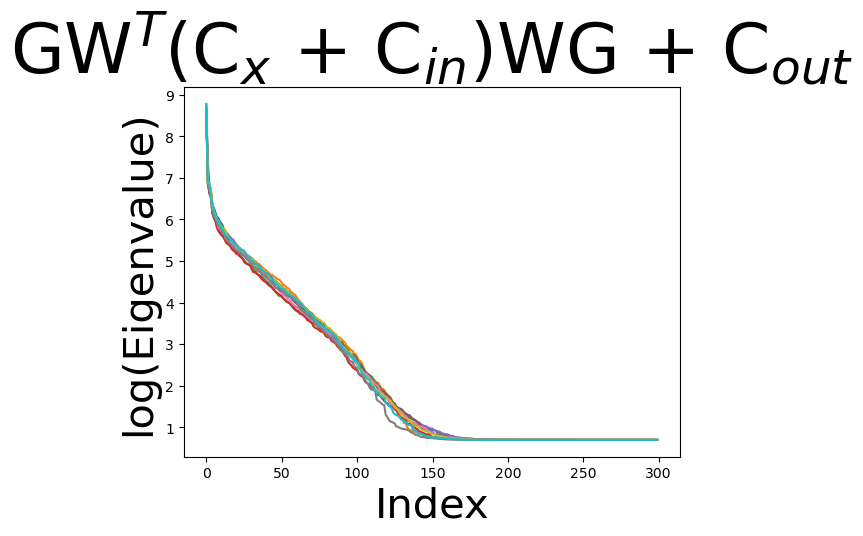

In [10]:
batch_size = 10
spec = MatrixSpectrum(test2, batch_size)
matplotlib.use("QtAgg")
%matplotlib inline
spec.plot_eigenvals()